<center>
    <h1>Tema 2: Aprendizaje Supervisado</h1>
    <br/>
    <h1>Regresión Lineal 2</h1>
    <br/>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

# Regresión Lineal. Predecir el precio de una vivienda

In [1]:
# importar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar algunos datos de ventas de casas
Los datos son de las ventas de casas en el [Condado de King](https://www.kaggle.com/harlfoxem/housesalesprediction), la región donde se encuentra la ciudad de Seattle

In [2]:
ventas = pd.read_csv('../datos/kc_house_data.csv')
ventas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
ventas.shape

(21613, 21)

In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
ventas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Atributos del Conjunto de Datos

Atributo   | Descripción                           | Tipo
:----------|---------------------------------------|---------|
ID         |Identificador de la casa               |Numérico
date       |Fecha en que se vendió la casa         |Cadena de Caracteres
price      |El precio es el objetivo de predicción |Numérico
bedrooms   |Número de habitaciones                 |Numérico
bathrooms  |Número de baños                        |Numérico
sqft_living|Área de la casa en pies cuadrados      |Númerico
sqft_lot   |Área del terreno enpies cuadrados      |Numérico
floors     |Pisos (niveles) de la casa             |Numérico
waterfront |Casa que tiene vista al agua           |Numérico
view       |Ha sido visto                          |Numérico
condition  |Qué tan buena es la condición (general)|Numérico
grade      |Calificación general otorgada a la unidad de vivienda |Numérico
sqft_above |Área en pies cuadrados sin contar el sótano |Numérico
sqft_basement|Área en pies cuadrados del sótano    |Numérico
yr_built   |Año construida                         |Numérico
yr_renovated|Año en que la casa fue renovada       |Numérico
zipcode    |Código postal                          |Numérico
lat        |Coordenada de latitud                  |Numérico
long       |Coordenada de longitud                 |Numérico
sqft_living15| Área de la casa en 2015 (implica-- algunas renovaciones)|Numérico
sqft_lot15 |Área del terreno en 2015 (implica-- algunas renovaciones)|Numérico

## Explorar los datos de las ventas de viviendas

El precio de la vivienda se correlaciona con el número de pies cuadrados de espacio habitable

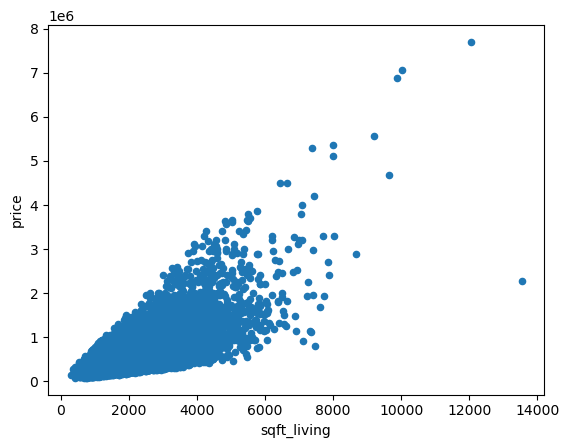

In [6]:
ventas.plot(kind='scatter', x='sqft_living', y='price');

## Crear un modelo de regresión simple de `sqft_living` a `price`

Dividir datos en entrenamiento y prueba.

In [7]:
from sklearn.model_selection import train_test_split
atributos_cols = ['sqft_living']
X = ventas[atributos_cols]
y = ventas.price
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.25, random_state=18)

In [8]:
print("Forma de X_entrenamiento: {}".format(X_entrenamiento.shape))
print("Forma de y_entrenamiento: {}".format(y_entrenamiento.shape))

Forma de X_entrenamiento: (16209, 1)
Forma de y_entrenamiento: (16209,)


In [9]:
print("Forma de X_prueba: {}".format(X_prueba.shape))
print("Forma de y_prueba: {}".format(y_prueba.shape))

Forma de X_prueba: (5404, 1)
Forma de y_prueba: (5404,)


## Construya el modelo de regresión usando sólo `sqft_living` como atributo

In [10]:
# seguir el patron de uso de sklearn: importar, instanciar, ajustar
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_entrenamiento, y_entrenamiento)

# imprimir intercepto y coeficientes
print (lm.intercept_)
print (lm.coef_)

-43661.44236467662
[280.27330293]


## Evaluar el modelo

In [11]:
lm.score(X_prueba, y_prueba)

0.4936542691767485

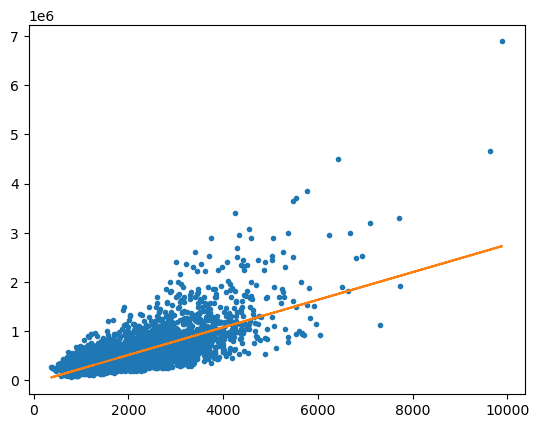

In [12]:
plt.plot(X_prueba,y_prueba,'.',
        X_prueba,lm.predict(X_prueba),'-');

## Explorar otros atributos de los datos

Para construir un modelo más elaborado, exploraremos más atributos.

In [13]:
mis_atributos = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
atributos_avanzados = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
    'condition', # condition of house				
    'grade', # measure of quality of construction				
    'waterfront', # waterfront property				
    'view', # type of view				
    'sqft_above', # square feet above ground				
    'sqft_basement', # square feet in basement				
    'yr_built', # the year built				
    'yr_renovated', # the year renovated				
    'lat', 'long', # the lat-long of the parcel				
    'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
    'sqft_lot15', # average lot size of 15 nearest neighbors 
]


## Construir un modelo con  `mis_atributos`

In [14]:
X1 = ventas[mis_atributos]
y1 = ventas.price
X1_entrenamiento, X1_prueba, y1_entrenamiento, y1_prueba = train_test_split(
    X1, y1, random_state=18)

In [15]:
print("Forma de X_entrenamiento: {}".format(X1_entrenamiento.shape))
print("Forma de y_entrenamiento: {}".format(y1_entrenamiento.shape))

Forma de X_entrenamiento: (16209, 6)
Forma de y_entrenamiento: (16209,)


In [16]:
print("Forma de X_prueba: {}".format(X1_prueba.shape))
print("Forma de y_prueba: {}".format(y1_prueba.shape))

Forma de X_prueba: (5404, 6)
Forma de y_prueba: (5404,)


In [17]:
lm1 = LinearRegression()
lm1.fit(X1_entrenamiento, y1_entrenamiento)
# imprimir intercepto y coeficientes
print (lm1.intercept_)
print (lm1.coef_)

-55486689.94266613
[-5.65523621e+04  1.00768368e+04  3.16195487e+02 -3.33690856e-01
 -1.82615833e+03  5.66341144e+02]


In [18]:
lm1.score(X1_prueba, y1_prueba)

0.5167741117224516

## Construir un modelo con  `atributos_avanzados`

In [20]:
X2 = ventas[atributos_avanzados]
y2 = ventas.price
X2_entrenamiento, X2_prueba, y2_entrenamiento, y2_prueba = train_test_split(
    X2, y2, random_state=18)

In [21]:
print("Forma de X_entrenamiento: {}".format(X2_entrenamiento.shape))
print("Forma de y_entrenamiento: {}".format(y2_entrenamiento.shape))

Forma de X_entrenamiento: (16209, 18)
Forma de y_entrenamiento: (16209,)


In [22]:
print("Forma de X_prueba: {}".format(X2_prueba.shape))
print("Forma de y_prueba: {}".format(y2_prueba.shape))

Forma de X_prueba: (5404, 18)
Forma de y_prueba: (5404,)


In [23]:
lm2 = LinearRegression()
lm2.fit(X2_entrenamiento, y2_entrenamiento)
# imprimir intercepto y coeficientes
print (lm2.intercept_)
print (lm2.coef_)

5884652.332748389
[-3.53701653e+04  3.99631054e+04  1.12120492e+02  1.10442680e-01
  9.00021077e+03 -5.75042795e+02  2.59985412e+04  9.36518042e+04
  5.94660009e+05  5.00988233e+04  7.01393912e+01  4.19811012e+01
 -2.60132668e+03  1.67762411e+01  6.07187442e+05 -2.13441747e+05
  2.39077923e+01 -3.52691458e-01]


In [24]:
lm2.score(X2_prueba, y2_prueba)

0.7015100141907433

## Aplicar modelos aprendidos para predecir los precios de 3 casas
La primera casa que usaremos se considera una casa "promedio" en Seattle.

In [25]:
casa1 = ventas[ventas.id == 5309101200]
casa1_X = casa1[atributos_cols]
casa1_X1 = casa1[mis_atributos]
casa1_X2 = casa1[atributos_avanzados]
casa1_y =  casa1.price
casa1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [26]:
casa1_y

1054    620000.0
Name: price, dtype: float64

In [27]:
lm.predict(casa1_X)

array([628994.48465729])

In [28]:
lm1.predict(casa1_X1)

array([631812.24669258])

In [29]:
lm2.predict(casa1_X2)

array([673739.24058041])

## Predicción de una segunda casa más elegante

Ahora examinaremos las predicciones para una casa más elegante.

In [30]:
casa2 = ventas[ventas.id == 1925069082]
casa2_X = casa2[atributos_cols]
casa2_X1 = casa2[mis_atributos]
casa2_X2 = casa2[atributos_avanzados]
casa2_y =  casa2.price
casa2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [31]:
casa2_y

1361    2200000.0
Name: price, dtype: float64

In [32]:
casa2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000.0,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="../figuras/734302_0.jpg">

In [33]:
lm.predict(casa2_X)

array([1256806.68321113])

In [34]:
lm1.predict(casa2_X1)

array([1260175.65923636])

In [35]:
lm2.predict(casa2_X2)

array([1962737.10393712])

## Última casa, super de lujo

Nuestra última casa es una propiedad muy grande de un famoso de Seattle.

In [36]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':[98039], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="../figuras/Bill_gates'_house.jpg">

In [37]:
lm.predict(pd.DataFrame(bill_gates['sqft_living']))

/Users/wladimir/miniforge3/envs/AA2024/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13970003.70392635])

## Regresión Polinomial

Comparar diferentes modelos de regresión para evaluar qué modelo se ajusta mejor. Vamos a utilizar la regresión polinomial como un medio para examinar este tema.

## Función `polinomial_dataframe`

Esta función crea un DataFrame con las potencias del atributo

In [20]:
def polinomial_dataframe(atributo, grado):
    # asumir que grado es >= 1
    # inicializar el DataFrame:
    poli_dataframe = pd.DataFrame()
    # fijar poli_dataframe['potencia_1'] igual al atributo pasado
    poli_dataframe['potencia_1'] = atributo
    # chequear si grado > 1
    if grado > 1:
        # realizar un lazo con los grados restantes:
        for potencia in range(2, grado+1): 
            # primero le damos el nombre a la columna:
            nombre = 'potencia_' + str(potencia)
            # luego asignamos a poli_dataframe[nombre] la potencia del atributo apropiada
            poli_dataframe[nombre] = atributo**potencia
    return poli_dataframe

In [39]:
tmp = pd.Series([1.0, 2.0, 3.0])
print (polinomial_dataframe(tmp, 3))

   potencia_1  potencia_2  potencia_3
0         1.0         1.0         1.0
1         2.0         4.0         8.0
2         3.0         9.0        27.0


## Visualizar la Regresión Polinomial

Vamos a usar matplotlib para visualizar la regresión polinomial sobre datos reales.

In [24]:
ventas = ventas.sort_values(['sqft_living', 'price'])
type(ventas.sqft_living)

pandas.core.series.Series

Comencemos con un polinomio de grado 1 usando `sqft_living` (es decir, una línea) para predecir `price` y graficar el resultado.

In [25]:
poli_data_X = polinomial_dataframe(ventas.sqft_living, 1)
poli_data_y = ventas.price

In [26]:
modelo1 = LinearRegression()
modelo1.fit(poli_data_X, poli_data_y)
print (modelo1.intercept_)
print (modelo1.coef_)

-43580.74309447652
[280.6235679]


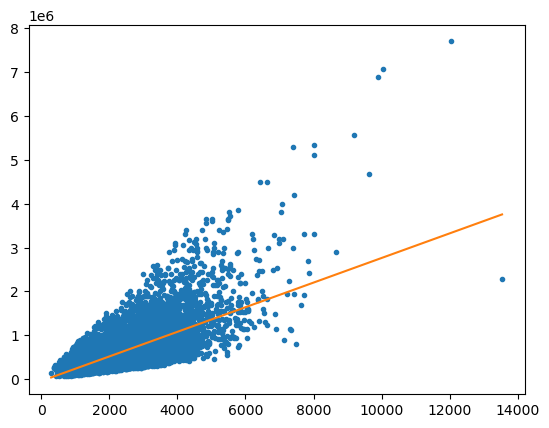

In [27]:
plt.plot(poli_data_X.potencia_1,poli_data_y,'.',
        poli_data_X.potencia_1,modelo1.predict(poli_data_X),'-')

Podemos ver, no sorprendentemente, que los valores predichos caen en una línea, específicamente la que tiene una pendiente 280 y una intercepción -43580. ¿Y si queremos graficar un polinomio de segundo grado?

In [28]:
poli2_data_X = polinomial_dataframe(ventas.sqft_living, 2)
poli2_data_y = ventas.price
poli2_data_X.head()

,potencia_1,potencia_2
19452,290,84100
15381,370,136900
860,380,144400
18379,384,147456
4868,390,152100


In [29]:
modelo2 = LinearRegression()
modelo2.fit(poli2_data_X, poli2_data_y)
print (modelo2.intercept_)
print (modelo2.coef_)
modelo2.score(poli2_data_X, poli2_data_y)

199222.27930548525
[6.79940947e+01 3.85812609e-02]


0.5327430940591442

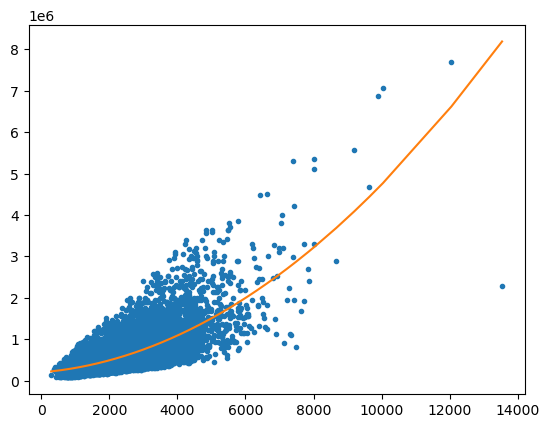

In [30]:
plt.plot(poli2_data_X.potencia_1, poli_data_y,'.',
        poli2_data_X.potencia_1, modelo2.predict(poli2_data_X),'-')

### Ahora generaremos un polinomio de grado tres

In [31]:
poli3_data_X = polinomial_dataframe(ventas.sqft_living, 3)
poli3_data_y = ventas.price
poli3_data_X.head(10)

,potencia_1,potencia_2,potencia_3
19452,290,84100,24389000
15381,370,136900,50653000
860,380,144400,54872000
18379,384,147456,56623104
4868,390,152100,59319000
21332,390,152100,59319000
8623,410,168100,68921000
11500,420,176400,74088000
14466,420,176400,74088000
465,430,184900,79507000


In [32]:
modelo3 = LinearRegression()
modelo3.fit(poli3_data_X, poli3_data_y)
print (modelo3.intercept_)
print (modelo3.coef_)
modelo3.score(poli3_data_X, poli3_data_y)

336819.7482214634
[-9.01819864e+01  8.70465089e-02 -3.84055260e-06]


0.5390045510503199

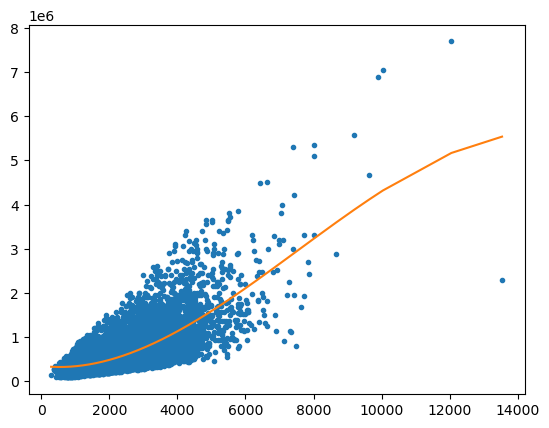

In [33]:
plt.plot(poli3_data_X.potencia_1, poli3_data_y,'.',
        poli3_data_X.potencia_1, modelo3.predict(poli3_data_X),'-')

### Ahora generaremos un polinomio de grado 15

In [43]:
poli15_data_X = polinomial_dataframe(ventas.sqft_living, 100)
poli15_data_y = ventas.price

In [44]:
modelo15 = LinearRegression()
modelo15.fit(poli15_data_X, poli15_data_y)
print (modelo15.intercept_)
#print (modelo15.coef_)

277923.05788974627


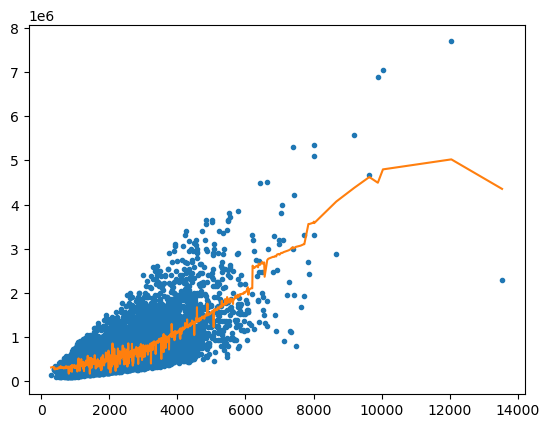

In [45]:
plt.plot(poli15_data_X.potencia_1, poli15_data_y,'.',
        poli15_data_X.potencia_1, modelo15.predict(poli15_data_X),'-')

### Referencias

- Curso de Coursera [Machine Learning: Regression](https://www.coursera.org/learn/ml-regression)